# Housing

Dataset Description:


The house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 1980.   

 Variables in order:
 
 
 - CRIM     per capita crime rate by town
 - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS    proportion of non-retail business acres per town
 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX      nitric oxides concentration (parts per 10 million)
 - RM       average number of rooms per dwelling
 - AGE      proportion of owner-occupied units built prior to 1940
 - DIS      weighted distances to five Boston employment centres
 - RAD      index of accessibility to radial highways
 - TAX      full-value property-tax rate per $10,000
 - PTRATIO  pupil-teacher ratio by town
 - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 
 - LSTAT    % lower status of the population
 - MEDV     Median value of owner-occupied homes in $1000's

In [105]:
# all liberaries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import missingno as msno

### 1. Load the dataset into pandas and get a peek at the underlying data in the dataframe.

In [106]:
# here uploading data with giving name.

house = pd.read_csv("housing.csv", names = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO"," B","LSTAT","MEDV"])

In [107]:
house.head()    # head of the table.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [108]:
house.tail()    # tail of the table.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [109]:
house = house.round()     # here i am rounding of values.

### 2. Provide the following information about the dataframe.

### (a). Dimensions of the dataframe

In [110]:
house.shape    # here i am checking no. of rows and columns.

(506, 14)

### (b). Information about the schema.

In [111]:
house.info()  # so, here i am collecting information of columns. it means Dtype, null value aslo.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11   B       506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


### (c). Statistical metrics of each column.

In [112]:
house.describe(include='all')   # so, this is the summary of all columns.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,452.000000
mean,1.215415,13.270751,9.211462,0.175889,1.132411,15.662055,58.731225,6.148221,78.063241,339.296443,42.608696,332.818182,11.539526,23.741150
std,2.446869,23.036171,7.245398,0.381103,1.701559,27.227651,33.093790,6.485610,203.542157,180.707858,87.595476,125.328079,6.051873,8.817026
min,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,1.000000,20.000000,3.000000,0.000000,2.000000,6.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000,6.000000,32.000000,2.000000,4.000000,254.000000,17.000000,365.250000,7.000000,18.000000
50%,0.000000,0.000000,7.000000,0.000000,1.000000,6.000000,65.000000,4.000000,5.000000,307.000000,19.000000,391.000000,10.000000,22.000000
75%,1.000000,18.000000,18.000000,0.000000,1.000000,7.000000,90.000000,6.000000,24.000000,403.000000,20.000000,396.000000,15.000000,27.000000
max,10.000000,100.000000,28.000000,1.000000,7.000000,100.000000,100.000000,24.000000,666.000000,711.000000,397.000000,397.000000,34.000000,50.000000


### 3. Conduct the following data pre-processing steps only as necessary along with the reason behind doing it with suitable steps.

### (a). Missing values.

<AxesSubplot:>

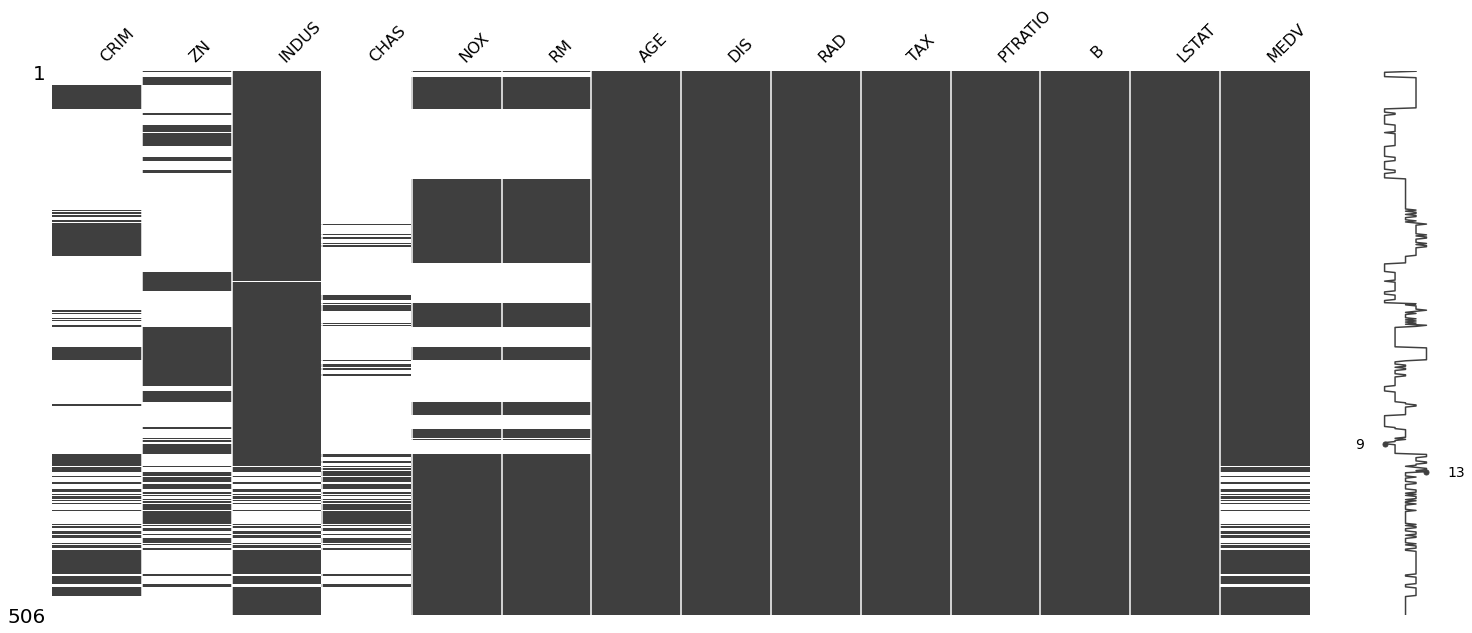

In [175]:
msno.matrix(house)    # here i am checking patterns of all columns.
                      # white line shows the there is the pattern of columns.

<AxesSubplot:>

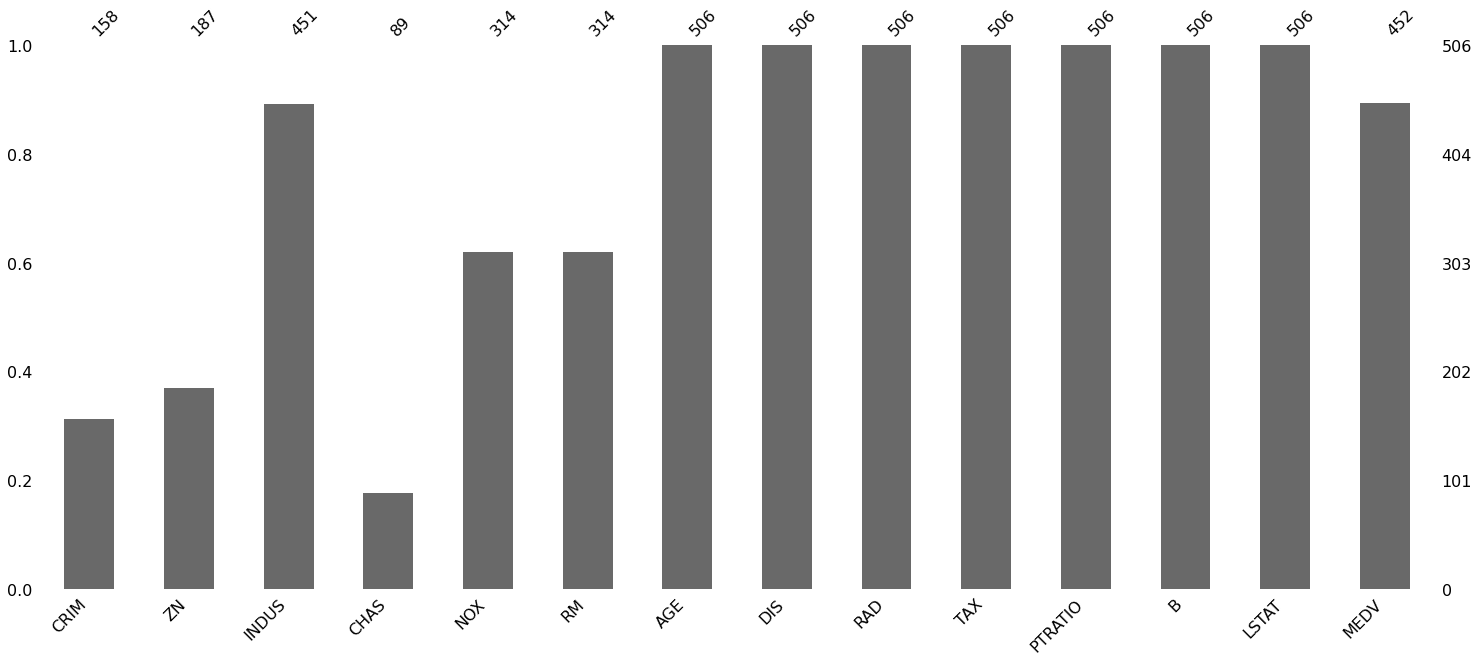

In [176]:
msno.bar(house)    # by this i am checking missing value.

<AxesSubplot:>

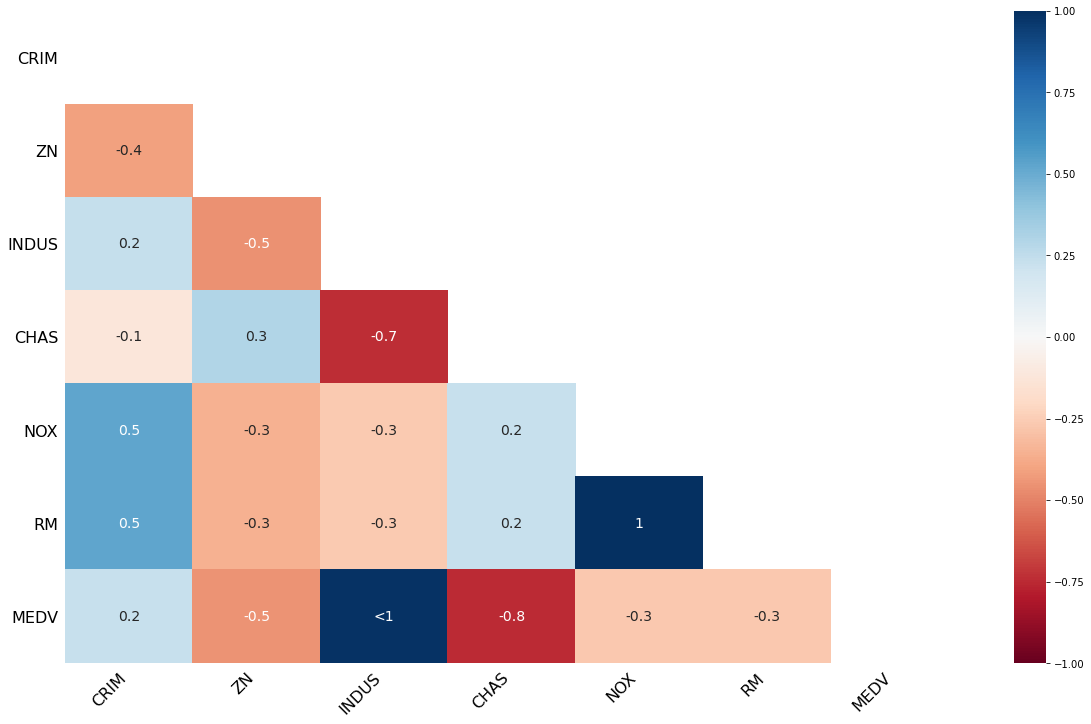

In [178]:
msno.heatmap(house)      # by using of this i am seeing the pattern of all columns.

In [113]:
house.info()    # here i am checking information of the columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11   B       506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [114]:
# so, this is the liberary i am using here.

from sklearn.impute import SimpleImputer

# here i am using median imputation technique to deal with the missing value.
house_median = house.copy(deep=True)
median_imputer = SimpleImputer(strategy='median')
house_median.iloc[:,:] = median_imputer.fit_transform(house_median)

In [115]:
# here i am changing 0 into Nan of all columns.

house['CRIM'] = house['CRIM'].apply(lambda x: np.nan if x==0 else x)
house['ZN'] = house['ZN'].apply(lambda x: np.nan if x==0 else x)
house['INDUS'] = house['INDUS'].apply(lambda x: np.nan if x==0 else x)
house['CHAS'] = house['CHAS'].apply(lambda x: np.nan if x==0 else x)
house['NOX'] = house['NOX'].apply(lambda x: np.nan if x==0 else x)
house['RM'] = house['NOX'].apply(lambda x: np.nan if x==0 else x)
house['AGE'] = house['AGE'].apply(lambda x: np.nan if x==0 else x)
house['DIS'] = house['DIS'].apply(lambda x: np.nan if x==0 else x)
house['RAD'] = house['RAD'].apply(lambda x: np.nan if x==0 else x)
house['TAX'] = house['TAX'].apply(lambda x: np.nan if x==0 else x)
house['PTRATIO'] = house['PTRATIO'].apply(lambda x: np.nan if x==0 else x)
house['LSTAT'] = house['LSTAT'].apply(lambda x: np.nan if x==0 else x)
house['MEDV'] = house['MEDV'].apply(lambda x: np.nan if x==0 else x)

In [116]:
# here i am changing the category of the columns. 

category = ["CHAS","NOX","RAD","LSTAT","INDUS"]

for i in category:
    house[i] = house[i].astype('category')

In [117]:
house.describe(include='all')     # this is the summary of all the columns with this checking columns min, max, etc.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,158.000000,188.000000,451.0,89.0,314.0,314.000000,506.000000,506.000000,506.0,506.000000,506.000000,506.000000,506.0,452.000000
unique,NaN,NaN,20.0,1.0,5.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,31.0,NaN
top,NaN,NaN,18.0,1.0,1.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,10.0,NaN
freq,NaN,NaN,78.0,89.0,260.0,NaN,NaN,NaN,115.0,NaN,NaN,NaN,47.0,NaN
mean,3.892405,35.718085,NaN,NaN,NaN,1.824841,58.731225,6.148221,NaN,339.296443,42.608696,332.818182,NaN,23.741150
std,2.961721,25.040295,NaN,NaN,NaN,1.844919,33.093790,6.485610,NaN,180.707858,87.595476,125.328079,NaN,8.817026
min,1.000000,12.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,20.000000,3.000000,0.000000,NaN,6.000000
25%,1.000000,18.000000,NaN,NaN,NaN,1.000000,32.000000,2.000000,NaN,254.000000,17.000000,365.250000,NaN,18.000000
50%,3.000000,22.000000,NaN,NaN,NaN,1.000000,65.000000,4.000000,NaN,307.000000,19.000000,391.000000,NaN,22.000000
75%,6.000000,45.000000,NaN,NaN,NaN,1.000000,90.000000,6.000000,NaN,403.000000,20.000000,396.000000,NaN,27.000000


### (b). Erroneous/wrong values.

In [118]:
# here i did repace the value of ZN.

house['ZN'] = house['ZN'].replace([100], np.nan)

In [119]:
house.describe(include='all')     # here again checking the value is changed or not in "ZN".

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,158.000000,187.000000,451.0,89.0,314.0,314.000000,506.000000,506.000000,506.0,506.000000,506.000000,506.000000,506.0,452.000000
unique,NaN,NaN,20.0,1.0,5.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,31.0,NaN
top,NaN,NaN,18.0,1.0,1.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,10.0,NaN
freq,NaN,NaN,78.0,89.0,260.0,NaN,NaN,NaN,115.0,NaN,NaN,NaN,47.0,NaN
mean,3.892405,35.374332,NaN,NaN,NaN,1.824841,58.731225,6.148221,NaN,339.296443,42.608696,332.818182,NaN,23.741150
std,2.961721,24.658724,NaN,NaN,NaN,1.844919,33.093790,6.485610,NaN,180.707858,87.595476,125.328079,NaN,8.817026
min,1.000000,12.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,20.000000,3.000000,0.000000,NaN,6.000000
25%,1.000000,18.000000,NaN,NaN,NaN,1.000000,32.000000,2.000000,NaN,254.000000,17.000000,365.250000,NaN,18.000000
50%,3.000000,22.000000,NaN,NaN,NaN,1.000000,65.000000,4.000000,NaN,307.000000,19.000000,391.000000,NaN,22.000000
75%,6.000000,45.000000,NaN,NaN,NaN,1.000000,90.000000,6.000000,NaN,403.000000,20.000000,396.000000,NaN,27.000000


### (c). Skewed data.

#### In this here i am checking skew data of all columns. By using of this i am also checking the outliers and checking it is positively or negatively skewed.

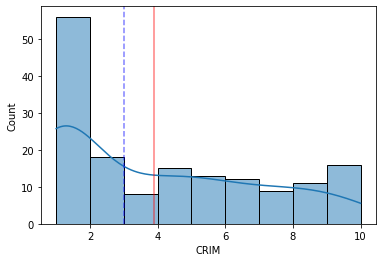

In [120]:
# so, this is "CRIM" column analysis.

sns.histplot(data=house['CRIM'],kde=True)
plt.axvline(x=house.CRIM.mean(),c='red',alpha=0.5,label='mean')
plt.axvline(x=house.CRIM.median(),c='blue',ls='--',alpha=0.5,label='median')
plt.show()

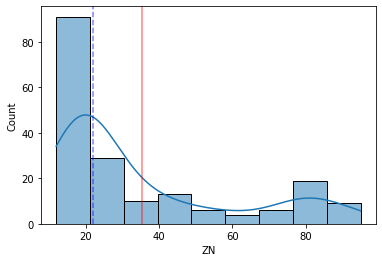

In [121]:
# so, this is "ZN" column analysis.

sns.histplot(data=house['ZN'],kde=True)
plt.axvline(x=house.ZN.mean(),c='red',alpha=0.5,label='mean')
plt.axvline(x=house.ZN.median(),c='blue',ls='--',alpha=0.5,label='median')
plt.show()

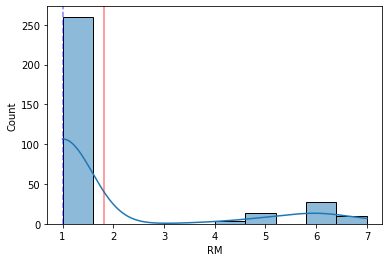

In [122]:
# so, this is "RM" column analysis.

sns.histplot(data=house['RM'],kde=True)
plt.axvline(x=house.RM.mean(),c='red',alpha=0.5,label='mean')
plt.axvline(x=house.RM.median(),c='blue',ls='--',alpha=0.5,label='median')
plt.show()

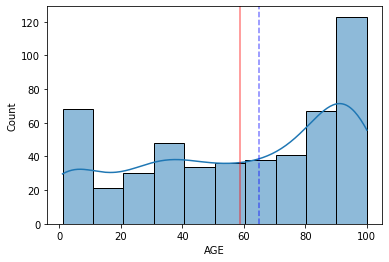

In [123]:
# so, this is "AGE" column analysis.

sns.histplot(data=house['AGE'],kde=True)
plt.axvline(x=house.AGE.mean(),c='red',alpha=0.5,label='mean')
plt.axvline(x=house.AGE.median(),c='blue',ls='--',alpha=0.5,label='median')
plt.show()

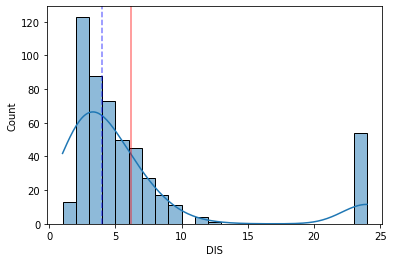

In [124]:
# so, this is "DIS" column analysis.

sns.histplot(data=house['DIS'],kde=True)
plt.axvline(x=house.DIS.mean(),c='red',alpha=0.5,label='mean')
plt.axvline(x=house.DIS.median(),c='blue',ls='--',alpha=0.5,label='median')
plt.show()

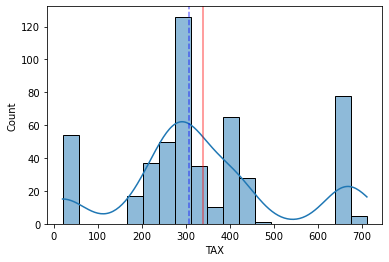

In [125]:
# so, this is "TAX" column analysis.

sns.histplot(data=house['TAX'],kde=True)
plt.axvline(x=house.TAX.mean(),c='red',alpha=0.5,label='mean')
plt.axvline(x=house.TAX.median(),c='blue',ls='--',alpha=0.5,label='median')
plt.show()

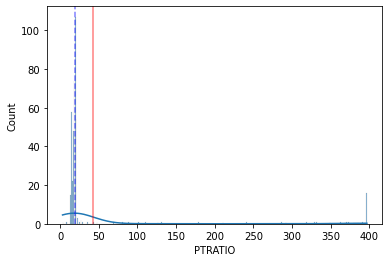

In [126]:
# so, this is "PTRATIO" column analysis.

sns.histplot(data=house['PTRATIO'],kde=True)
plt.axvline(x=house.PTRATIO.mean(),c='red',alpha=0.5,label='mean')
plt.axvline(x=house.PTRATIO.median(),c='blue',ls='--',alpha=0.5,label='median')
plt.show()

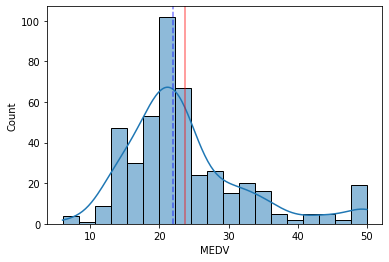

In [127]:
# so, this is "MEDV" column analysis.

sns.histplot(data=house['MEDV'],kde=True)
plt.axvline(x=house.MEDV.mean(),c='red',alpha=0.5,label='mean')
plt.axvline(x=house.MEDV.median(),c='blue',ls='--',alpha=0.5,label='median')
plt.show()

### (d). Outliers.

#### Here I am trying to reduce outliers or comprise it as possible by using of Log Transformation.

In [128]:
house['CRIM'] = np.log(house['CRIM'])   # log transformation.

In [129]:
house['ZN'] = np.log(house['ZN'])       # log transformation.

In [130]:
house['RM'] = np.log(house['RM'])         # log transformation.

In [131]:
house['AGE'] = np.log(house['AGE'])       # log transformation.

In [132]:
house['DIS'] = np.log(house['DIS'])       # log transformation.

In [133]:
house['TAX'] = np.log(house['TAX'])         # log transformation.

In [134]:
house['PTRATIO'] = np.log(house['PTRATIO'])     # log transformation.

In [135]:
house['MEDV'] = np.log(house['MEDV'])           # log transformation.

#### Below we can see the graph and changes after using of Log Transformaation.

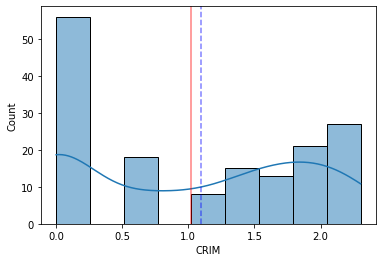

In [136]:
# CRIM column analysis with checking distribution also.

sns.histplot(data=house['CRIM'],kde=True)
plt.axvline(x=house.CRIM.mean(),c='red',alpha=0.5,label='mean')
plt.axvline(x=house.CRIM.median(),c='blue',ls='--',alpha=0.5,label='median')
plt.show()

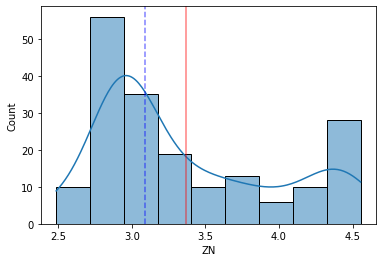

In [137]:
# ZN column analysis with checking distribution also.

sns.histplot(data=house['ZN'],kde=True)
plt.axvline(x=house.ZN.mean(),c='red',alpha=0.5,label='mean')
plt.axvline(x=house.ZN.median(),c='blue',ls='--',alpha=0.5,label='median')
plt.show()

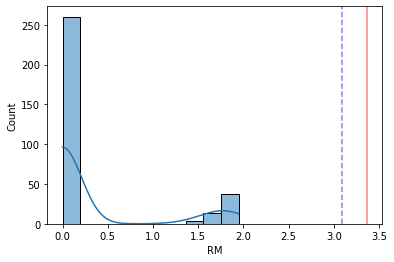

In [138]:
# RM column analysis with checking distribution also.

sns.histplot(data=house['RM'],kde=True)
plt.axvline(x=house.ZN.mean(),c='red',alpha=0.5,label='mean')
plt.axvline(x=house.ZN.median(),c='blue',ls='--',alpha=0.5,label='median')
plt.show()

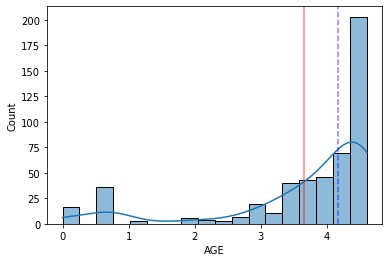

In [139]:
# AGE column analysis with checking distribution also.

sns.histplot(data=house['AGE'],kde=True)
plt.axvline(x=house.AGE.mean(),c='red',alpha=0.5,label='mean')
plt.axvline(x=house.AGE.median(),c='blue',ls='--',alpha=0.5,label='median')
plt.show()

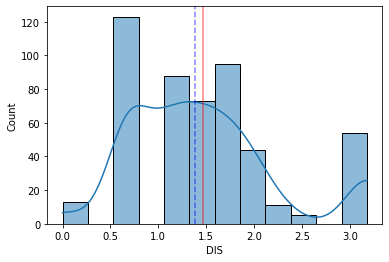

In [140]:
# DIS column analysis with checking distribution also.

sns.histplot(data=house['DIS'],kde=True)
plt.axvline(x=house.DIS.mean(),c='red',alpha=0.5,label='mean')
plt.axvline(x=house.DIS.median(),c='blue',ls='--',alpha=0.5,label='median')
plt.show()

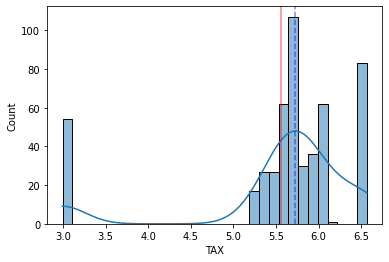

In [141]:
# # TAX column analysis with checking distribution also.

sns.histplot(data=house['TAX'],kde=True)
plt.axvline(x=house.TAX.mean(),c='red',alpha=0.5,label='mean')
plt.axvline(x=house.TAX.median(),c='blue',ls='--',alpha=0.5,label='median')
plt.show()

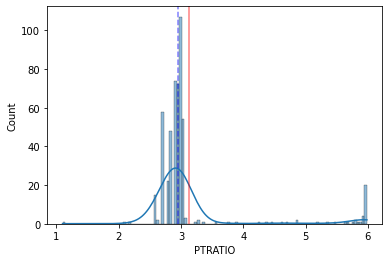

In [142]:
# PTRATIO column analysis with checking distribution also.

sns.histplot(data=house['PTRATIO'],kde=True)
plt.axvline(x=house.PTRATIO.mean(),c='red',alpha=0.5,label='mean')
plt.axvline(x=house.PTRATIO.median(),c='blue',ls='--',alpha=0.5,label='median')
plt.show()

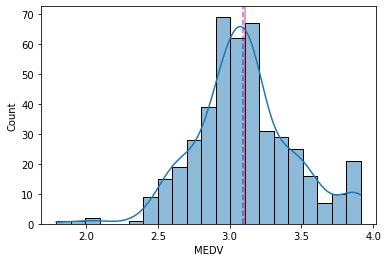

In [143]:
# MEDV column analysis with checking distribution also.

sns.histplot(data=house['MEDV'],kde=True)
plt.axvline(x=house.MEDV.mean(),c='red',alpha=0.5,label='mean')
plt.axvline(x=house.MEDV.median(),c='blue',ls='--',alpha=0.5,label='median')
plt.show()

### 4. Perform exploratory data analysis and provide key insights derived from the same backed with suitable graphs and plots. Few hints to get you started.

### (a). Distribution of numerical variables.

array([[<AxesSubplot:title={'center':'CRIM'}>]], dtype=object)

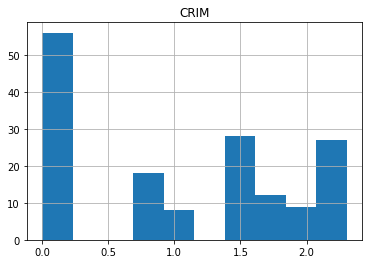

In [144]:
house.hist(column = 'CRIM', bins = 10)   # here i am checking distribution of numeric variable.
                                         # according to me "CRIM" column is normally distributed.

array([[<AxesSubplot:title={'center':'ZN'}>]], dtype=object)

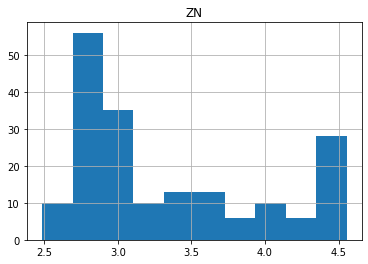

In [145]:
house.hist(column = 'ZN', bins = 10)      # here i am checking distribution of numeric variable.
                                          # according to me "ZN" column is similar to normally distributed.

array([[<AxesSubplot:title={'center':'RM'}>]], dtype=object)

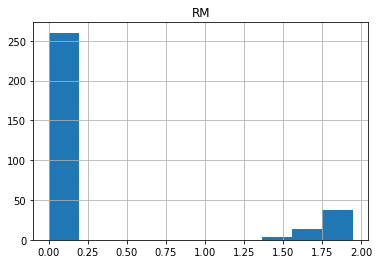

In [146]:
house.hist(column = 'RM', bins = 10)        # here i am checking distribution of numeric variable.
                                            # according to me "RM" column have outliers between 1.5 to 2.0 something.

array([[<AxesSubplot:title={'center':'AGE'}>]], dtype=object)

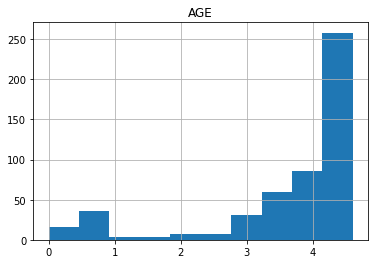

In [147]:
house.hist(column = 'AGE', bins = 10)        # here i am checking distribution of numeric variable.
                                             # according to me "AGE" column is negatively sloped have outliers.

array([[<AxesSubplot:title={'center':'DIS'}>]], dtype=object)

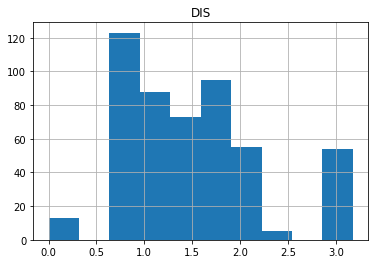

In [148]:
house.hist(column = 'DIS', bins = 10)          # here i am checking distribution of numeric variable.
                                               # according to me "DIS" column is similar to normally distributed but conntain one outliers also.

array([[<AxesSubplot:title={'center':'TAX'}>]], dtype=object)

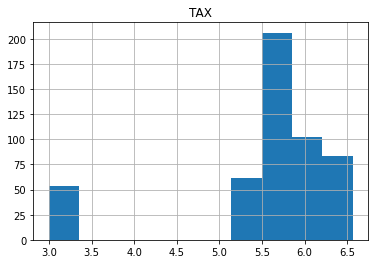

In [149]:
house.hist(column = 'TAX', bins = 10)         # here i am checking distribution of numeric variable.
                                              # according to me "TAX" column is not similar to normally distributed have some outliers.

array([[<AxesSubplot:title={'center':'PTRATIO'}>]], dtype=object)

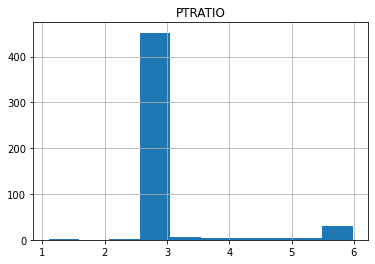

In [150]:
house.hist(column = 'PTRATIO', bins = 10)           # here i am checking distribution of numeric variable.
                                                    # according to me "PTRATIO" column is similar to normally distributed but have some outliers.

array([[<AxesSubplot:title={'center':'MEDV'}>]], dtype=object)

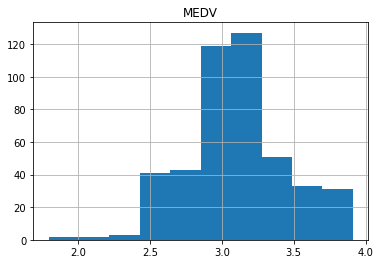

In [151]:
house.hist(column = 'MEDV', bins = 10)          # here i am checking distribution of numeric variable.
                                                # according to me "MEDV" column is similar to normally distributed.

### (b). Distribution of categorical variables.

#### So, here i am checking all categorical columns with bar plot in histogram. It is the best approach to see categorical columns.

<BarContainer object of 20 artists>

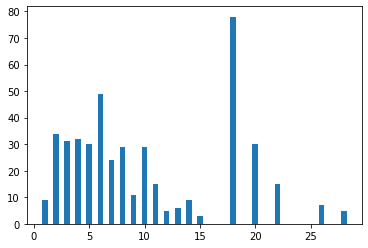

In [152]:
categories = house['INDUS'].value_counts().index
counts = house['INDUS'].value_counts().values                # here i am dealing with category or seeing the distribution.
plt.bar(categories, counts, width=0.5)

<BarContainer object of 1 artists>

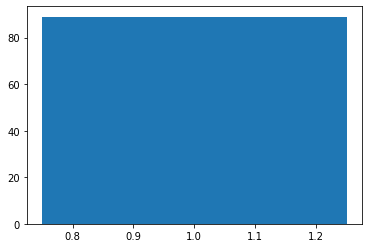

In [153]:
categories = house['CHAS'].value_counts().index
counts = house['CHAS'].value_counts().values                # here i am dealing with category or seeing the distribution.
plt.bar(categories, counts, width=0.5)

<BarContainer object of 5 artists>

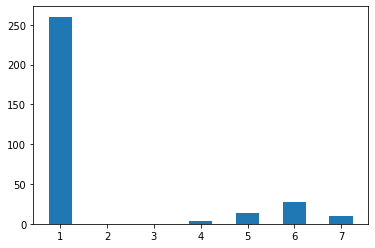

In [154]:
categories = house['NOX'].value_counts().index
counts = house['NOX'].value_counts().values               # here i am dealing with category or seeing the distribution.
plt.bar(categories, counts, width=0.5)

<BarContainer object of 10 artists>

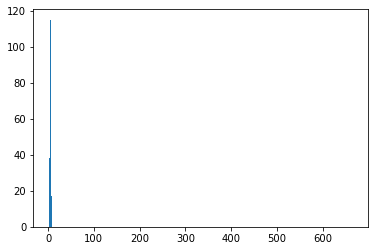

In [155]:
categories = house['RAD'].value_counts().index
counts = house['RAD'].value_counts().values               # here i am dealing with category or seeing the distribution.
plt.bar(categories, counts, width=0.5)

<BarContainer object of 31 artists>

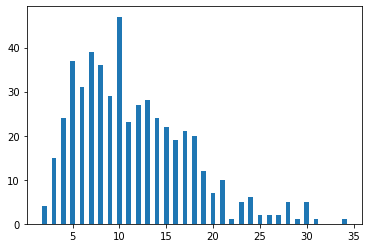

In [156]:
categories = house['LSTAT'].value_counts().index
counts = house['LSTAT'].value_counts().values             # here i am dealing with category or seeing the distribution.
plt.bar(categories, counts, width=0.5)

### (c). Numerical vs Categorical plots

#### Here i am doing comparison of numerical vs categorical by using of different columns and different plots.

<AxesSubplot:xlabel='INDUS', ylabel='CRIM'>

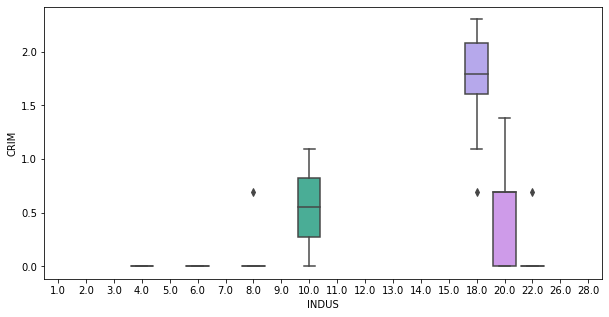

In [159]:
# here i am using boxplot.
# checking CRIM with INDUS.

plt.figure(figsize=(10,5))
sns.boxplot(x="INDUS",y="CRIM",data=house)

<AxesSubplot:xlabel='CHAS', ylabel='AGE'>

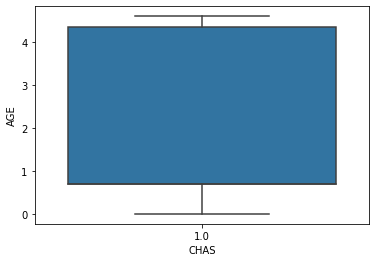

In [164]:
# here i am using boxplot.
# checking CHAS with AGE.
# here is no outliers.

sns.boxplot(x="CHAS",y="AGE",data=house)

<AxesSubplot:xlabel='NOX', ylabel='DIS'>

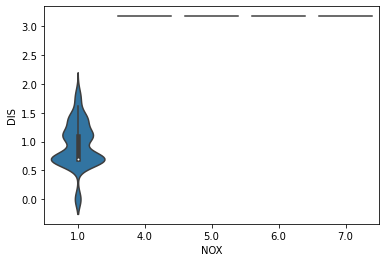

In [168]:
# here i am using violin plot.
# checking NOX with DIS.
# here is also 4 ouliers.

sns.violinplot(x="NOX",y="DIS",data=house)

<AxesSubplot:xlabel='LSTAT', ylabel='AGE'>

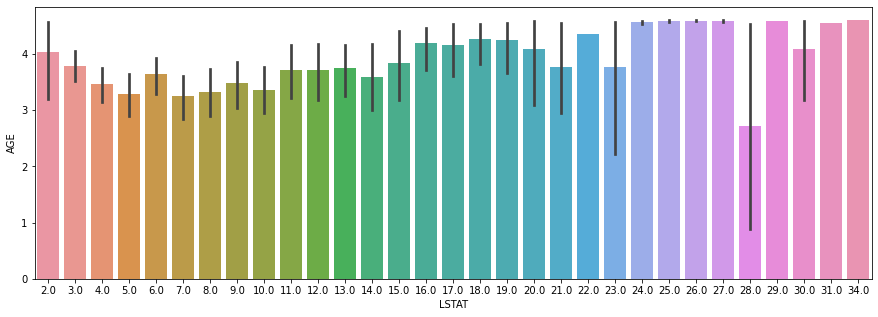

In [174]:
# here i am using baxplot.
# checking LSTAT with AGE.

plt.figure(figsize=(15,5))
sns.barplot(x="LSTAT",y="AGE",data=house)

### (d). Numerical vs Numerical plots.

#### Here i am checking the pattern of numeric vs numeric.

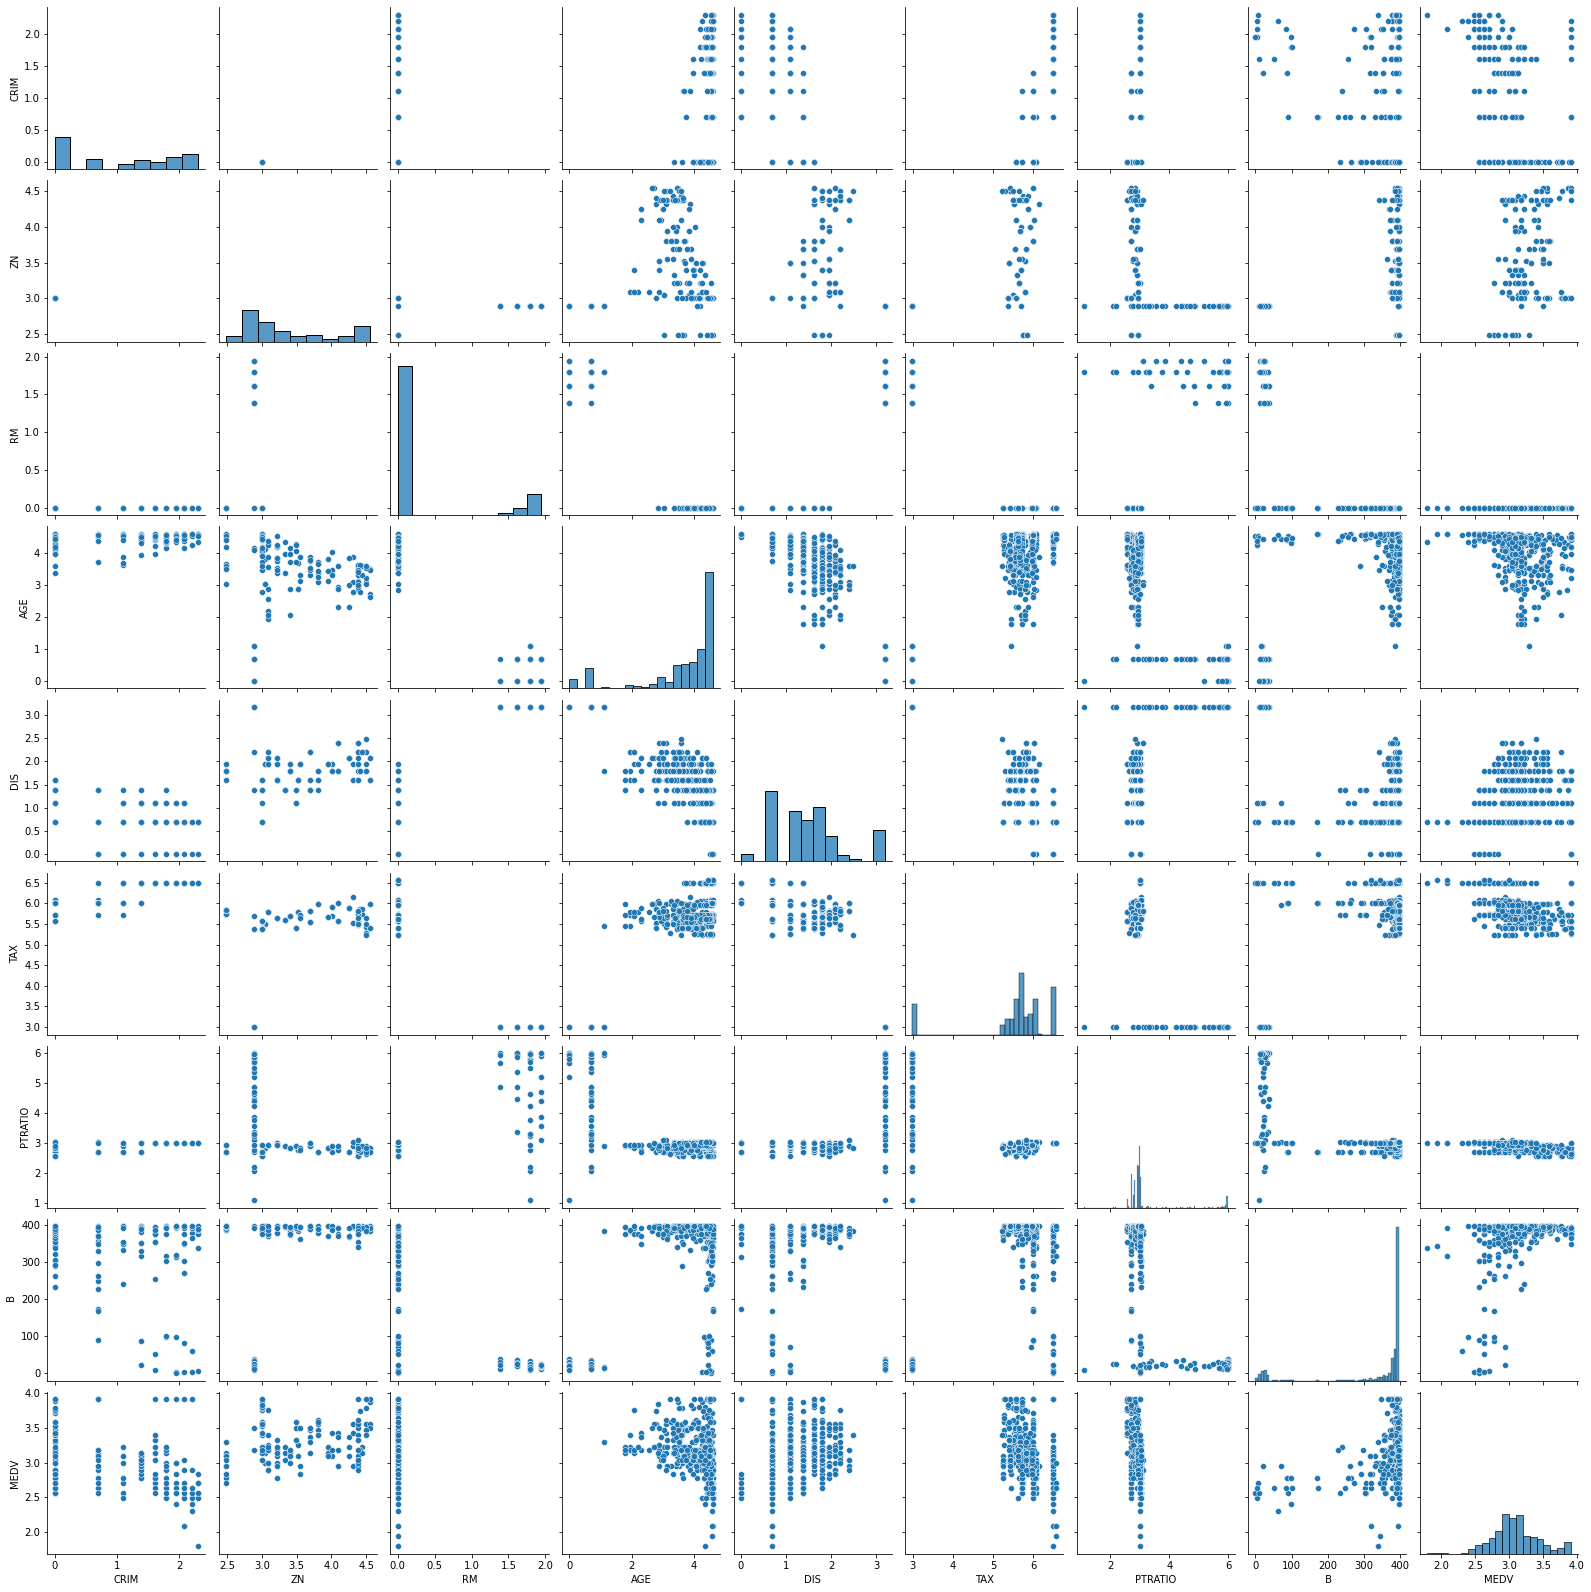

In [180]:
# checking the pattern. here by seeing scatter plot and histogram also.

sns.pairplot(house)
plt.show()

#### Another i am applying scatter plot for each column.

<AxesSubplot:xlabel='CRIM', ylabel='AGE'>

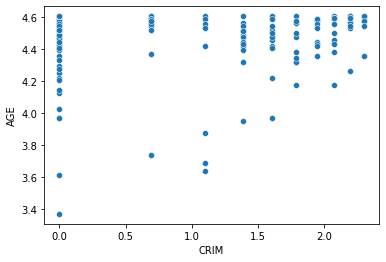

In [185]:
# so, this is numerical vs numerical plot.
# so, doing comparison of CRIM with AGE.

sns.scatterplot(x="CRIM",y="AGE",data=house)

<AxesSubplot:xlabel='DIS', ylabel='AGE'>

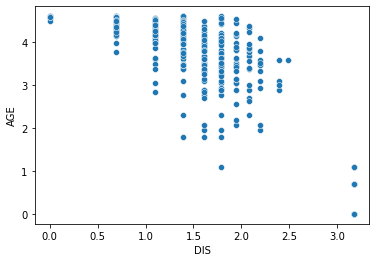

In [186]:
# so, this is numerical vs numerical plot.
# so, doing comparison of DIS with AGE.

sns.scatterplot(x="DIS",y="AGE",data=house)

<AxesSubplot:xlabel='LSTAT', ylabel='AGE'>

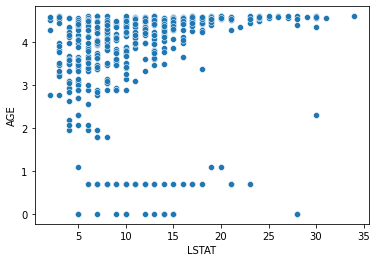

In [187]:
# so, this is numerical vs numerical plot.
# so, doing comparison of LSTAT with AGE.
# but here is no pattern

sns.scatterplot(x="LSTAT",y="AGE",data=house)